## Problema de Subsequência mais longa

* Docente: Arthur Craveiro.
* Email: arthur.craveiro@gmail.com
* Sala: 1A-57.

* Disciplina: Algoritmos I / GA-026.
* Professor: Roberto P. Souto.

In [4]:
import time, timeit
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def longest_increasing_subsequence(arr):
    n = len(arr)

    #Verificação para melhor caso: sequência decrescente
    #if all(arr[i] >= arr[i + 1] for i in range(n - 1)):
        #return [arr[0]]

    # Inicializa a tabela LIS com listas vazias
    lis = [[] for _ in range(n)]

    # Inicializa a primeira subsequência com o primeiro elemento da sequência original
    lis[0] = [arr[0]]

    # Percorre os elementos da sequência
    for i in range(1, n):
        for j in range(0, i):
            if arr[i] > arr[j] and len(lis[i]) < len(lis[j]) + 1:
                lis[i] = lis[j] + [arr[i]]

    # Encontra a subsequência mais longa
    result = max(lis, key=len)

    # Retorna a subsequência mais longa
    return result

# Exemplo de uso
seq = [3, 10, 2, 1, 20]
resultado = longest_increasing_subsequence(seq)
print("Subsequência crescente mais longa:", resultado)

Subsequência crescente mais longa: [3, 10, 20]


In [2]:
def medir_tempo(algoritmo, entrada):
    return timeit.timeit(lambda: algoritmo(entrada), number=10) / 10  # Média de 10 execuções

def gerar_instancia_pior_caso(tamanho):
    return list(range(1, tamanho + 1))

def gerar_instancia_melhor_caso(tamanho):
    return list(range(tamanho, 0, -1))

def gerar_instancia_caso_medio(tamanho):
    return list(np.random.randint(1, 5000, tamanho))

def teste_tempo(algoritmo, instancia, nome_instancia):
    tempos = []
    tamanhos = []

    for tamanho in instancia:
        if nome_instancia == 'Melhor Caso':
            arr = gerar_instancia_melhor_caso(tamanho)
        elif nome_instancia == 'Pior Caso':
            arr = gerar_instancia_pior_caso(tamanho)
        else:
            arr = gerar_instancia_caso_medio(tamanho)

        tempo = medir_tempo(algoritmo, arr)
        tempos.append(tempo)
        tamanhos.append(tamanho)

        print(f"Tempo para {nome_instancia} (tamanho {tamanho}): {tempo:.6f} segundos")

    return tamanhos, tempos

In [5]:
# Tamanhos de instância
tamanhos = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Teste para o melhor caso
tamanhos_melhor_caso, tempos_melhor_caso = teste_tempo(longest_increasing_subsequence, tamanhos, 'Melhor Caso')

# Teste para o pior caso
tamanhos_pior_caso, tempos_pior_caso = teste_tempo(longest_increasing_subsequence, tamanhos, 'Pior Caso')

# Teste para o caso médio (geração aleatória de instâncias)
tamanhos_caso_medio, tempos_caso_medio = teste_tempo(longest_increasing_subsequence, tamanhos, 'Caso Médio')

Tempo para Melhor Caso (tamanho 100): 0.000741 segundos
Tempo para Melhor Caso (tamanho 200): 0.001690 segundos
Tempo para Melhor Caso (tamanho 300): 0.003493 segundos
Tempo para Melhor Caso (tamanho 400): 0.006338 segundos
Tempo para Melhor Caso (tamanho 500): 0.011355 segundos
Tempo para Melhor Caso (tamanho 600): 0.014851 segundos
Tempo para Melhor Caso (tamanho 700): 0.021254 segundos
Tempo para Melhor Caso (tamanho 800): 0.027451 segundos
Tempo para Melhor Caso (tamanho 900): 0.034550 segundos
Tempo para Melhor Caso (tamanho 1000): 0.042887 segundos
Tempo para Pior Caso (tamanho 100): 0.002547 segundos
Tempo para Pior Caso (tamanho 200): 0.011955 segundos
Tempo para Pior Caso (tamanho 300): 0.032483 segundos
Tempo para Pior Caso (tamanho 400): 0.124649 segundos
Tempo para Pior Caso (tamanho 500): 0.287516 segundos
Tempo para Pior Caso (tamanho 600): 0.633969 segundos
Tempo para Pior Caso (tamanho 700): 0.280230 segundos
Tempo para Pior Caso (tamanho 800): 0.414865 segundos
Tempo p

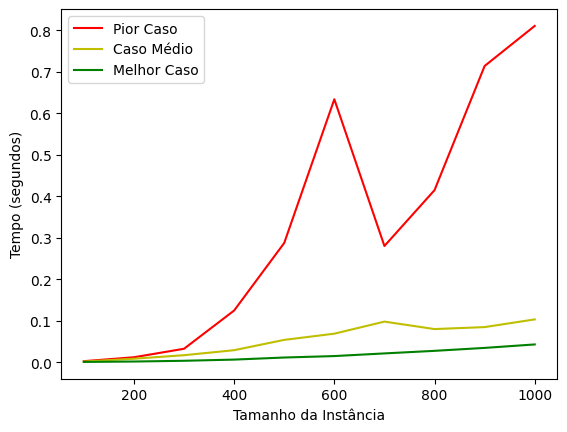

In [6]:
plt.plot(tamanhos_pior_caso, tempos_pior_caso, label='Pior Caso', color='r')
plt.plot(tamanhos_caso_medio, tempos_caso_medio, label='Caso Médio', color='y')
plt.plot(tamanhos_melhor_caso, tempos_melhor_caso, label='Melhor Caso', color='g')

plt.xlabel('Tamanho da Instância')
plt.ylabel('Tempo (segundos)')
plt.legend()
plt.show()